In [15]:
#importing necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
reports = pd.read_csv('indian_liver_patient.csv')
reports.head()   

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
reports['Age'].head()
reports.isnull().sum()  #has 4-missing data values in 583*11 columns

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [18]:
reports.describe(include='all') #verified frequencies and contents - missing Albumin and Globulin Ratio

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [19]:
reports.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [20]:
reports.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [21]:
#Data Visulisations [scatter_plot]
x = reports['Age']
y = reports['Albumin_and_Globulin_Ratio']

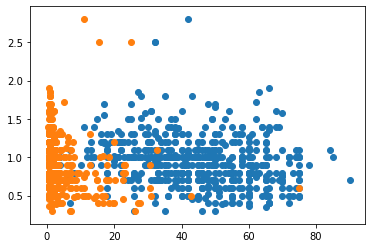

In [22]:
plt.scatter(x,y)
plt.scatter(reports['Total_Bilirubin'],y)

Text(0.5, 0.98, 'Gender to Age occurence')

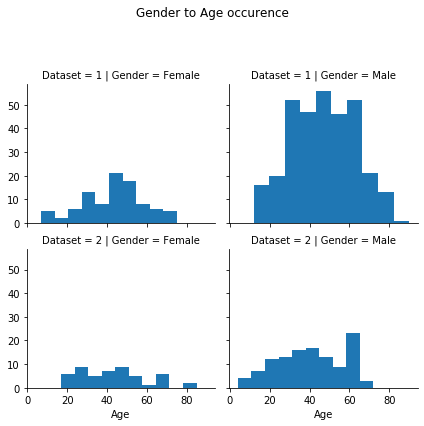

In [23]:
vis = sns.FacetGrid(reports,col='Gender',row='Dataset')
vis.map(plt.hist,'Age')
plt.subplots_adjust(top=0.8)
vis.fig.suptitle('Gender to Age occurence')

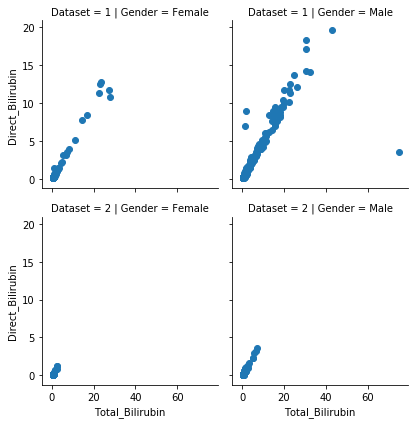

In [24]:
vis = sns.FacetGrid(reports,col='Gender',row='Dataset')
vis.map(plt.scatter,'Total_Bilirubin','Direct_Bilirubin')

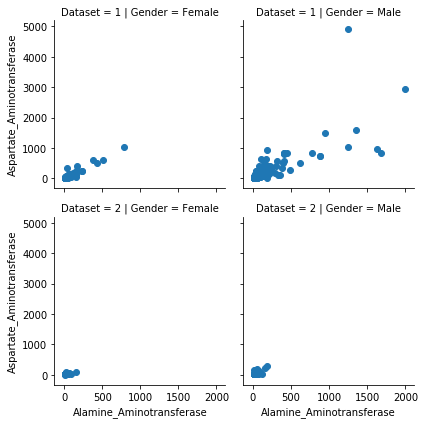

In [48]:
vis = sns.FacetGrid(reports,col='Gender',row='Dataset')
vis.map(plt.scatter,'Alamine_Aminotransferase','Aspartate_Aminotransferase')

In [26]:
reports.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [27]:
#filling null values in the column
reports["Albumin_and_Globulin_Ratio"] = reports.Albumin_and_Globulin_Ratio.fillna(reports['Albumin_and_Globulin_Ratio'].mean())

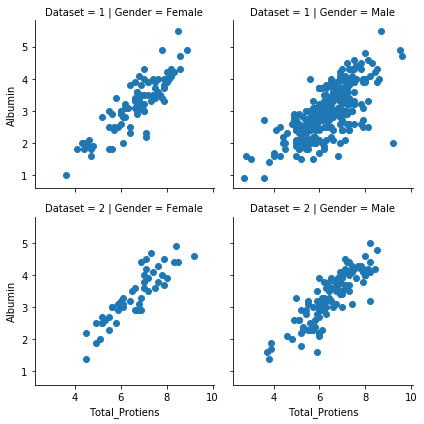

In [49]:
vis = sns.FacetGrid(reports,col='Gender',row='Dataset')
vis.map(plt.scatter,'Total_Protiens','Albumin')

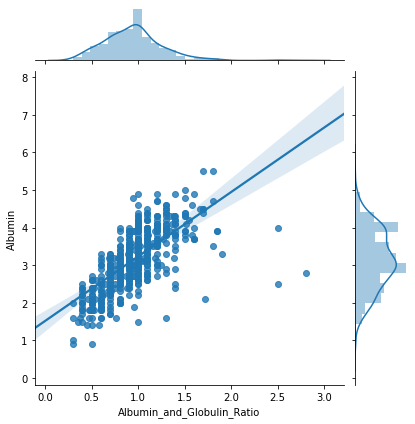

In [53]:
vis = sns.jointplot('Albumin_and_Globulin_Ratio','Albumin',data=reports,kind='reg')

In [30]:
#from above graph's , it's clear that the following have a direct relationship 
#total biluribin and direct bilirubin , Alamine and Aspartate , total_protiens and albumin , globulin ratio and albumin
#i.e -> if one increases, the other also increases or vice-versa

In [31]:
reports.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [54]:
modulated_data = pd.get_dummies(reports['Gender'])  #changing categorical data to one common data-type -> !Strings

In [33]:
modulated_data.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
reports = pd.concat([reports,pd.get_dummies(reports['Gender'])], axis=1)


In [35]:
reports.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [36]:
reports.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [37]:
reports[reports['Albumin_and_Globulin_Ratio'].isnull()] 
#To check if there are any empty sets in input values for prediction model

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male


In [38]:
x = reports.drop(['Gender','Dataset'],axis=1) #The data-sets are used as labels and input values for prediction 
y = reports['Dataset']                        #model are the rest. 

In [39]:
reports_corelation = x.corr()

In [40]:
reports_corelation.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332


Text(0.5, 1, 'Relation correspondance heat-map')

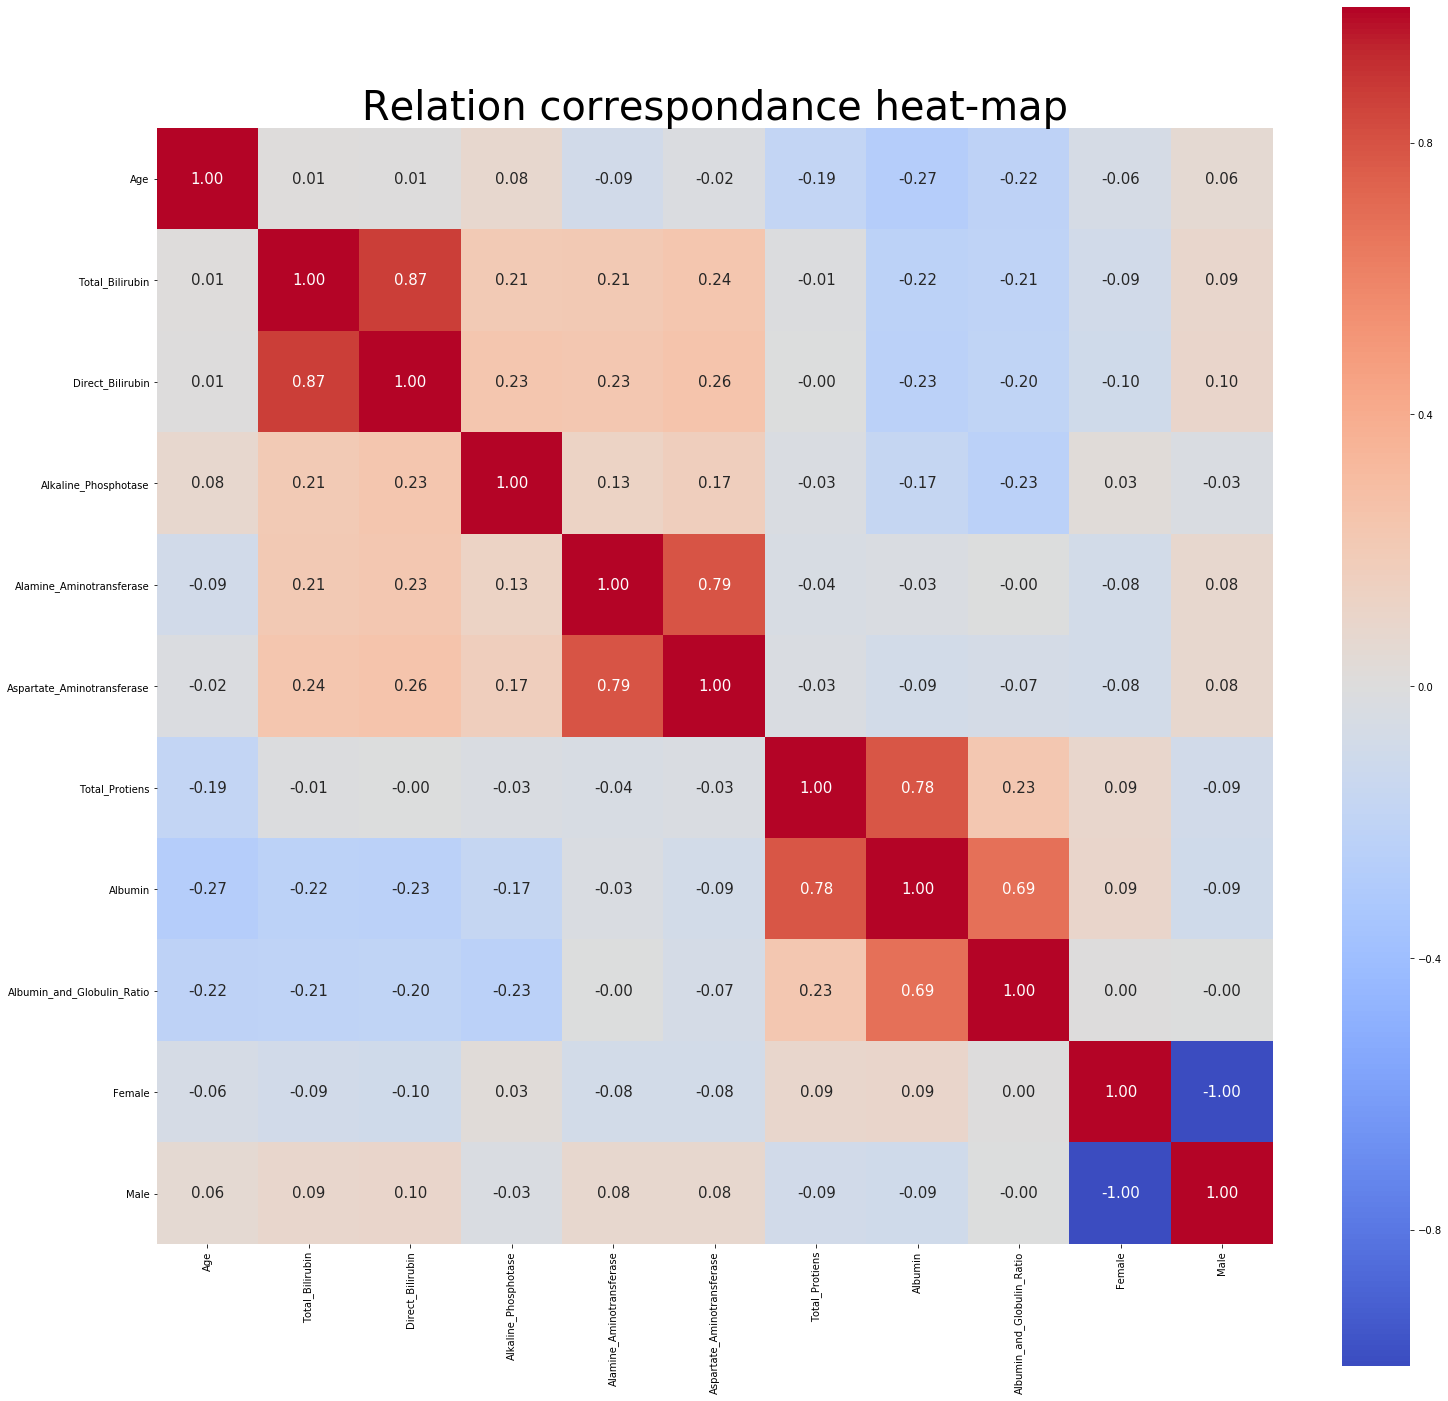

In [41]:
plt.figure(figsize = (25,25))
sns.heatmap(reports_corelation, cbar = True,square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Relation correspondance heat-map',size='40') 
#the block completely explains relation between the above mentioned quantities and relations

In [42]:
reports.isnull().sum()  #final check to make sure no NaN exist 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Female                        0
Male                          0
dtype: int64

In [43]:
#machine learning part - Training and testing!

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.50,random_state = 100)

In [44]:
logreg = LogisticRegression()      # Object-Creation
logreg.fit(x_train,y_train)        # Fitting the data into the object
predict = logreg.predict(x_test)  

logreg_train_score = round(logreg.score(x_train,y_train)*100,2)
logreg_test_score = round(logreg.score(x_test,y_test)*100,2)
accuracy = accuracy_score(y_test,predict)
class_report = classification_report(y_test,predict)

In [45]:
print("train-score : " , logreg_train_score)   #Logistic Regression model 
print("test-score : " , logreg_test_score)
print("Accuracy Score : " , accuracy)
print("Classification-Report : " , class_report)

train-score :  72.51
test-score :  72.6
Accuracy Score :  0.726027397260274
Classification-Report :                precision    recall  f1-score   support

           1       0.77      0.89      0.83       216
           2       0.45      0.25      0.32        76

    accuracy                           0.73       292
   macro avg       0.61      0.57      0.58       292
weighted avg       0.69      0.73      0.70       292



In [46]:
ranforest = RandomForestClassifier(n_estimators=100)  #Random_forest prediction model
ranforest.fit(x_train,y_train)
predict = ranforest.predict(x_test)

print("train-score : " , round(ranforest.score(x_train,y_train)*100.2))
print("test-score : "  , round(ranforest.score(x_test,y_test)*100,2))
print("Accuracy-Score : " , accuracy_score(y_test,predict))
print("classification-Report : " , classification_report(y_test,predict))

train-score :  100.0
test-score :  72.26
Accuracy-Score :  0.7226027397260274
classification-Report :                precision    recall  f1-score   support

           1       0.77      0.88      0.83       216
           2       0.44      0.26      0.33        76

    accuracy                           0.72       292
   macro avg       0.61      0.57      0.58       292
weighted avg       0.69      0.72      0.70       292

